In [1]:
#Determine how many tabs are in an excel file, then read the file into a dataframe and print the first 5 rows
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

#Velmeshev 2019 does single nucleus RNAseq on ASD and control samples of prefrontal cortex and anterior cingulate cortex in postmortem human brain samples
df = pd.read_excel('/Users/alec/Dropbox/Mac/Documents/Fraenkel_Farhi_Lab/ASD_Experiments/Analysis/Velmeshev_2019_DEGs_S4.xlsx', 
                   sheet_name=['ASD_DEGs', 'ASD_regional_DEGs', 'Bulk_deconvolution_DEGs', 'Individual_specific_DEGs'])

#Boulting 2020 does high [KCl] patch clamping on isogenic human iPSC GABAergic neurons then RNA sequences them
# at 15min, 1hr, 2hr, and 4hr using scRNAseq and bulk RNAseq (total)
df1 = pd.read_excel('/Users/alec/Dropbox/Mac/Documents/Fraenkel_Farhi_Lab/ASD_Experiments/Analysis/Boulting_2020_Differential_RNA.xlsx', 
                    sheet_name=['1-15min 1G totalRNAseq', 
                                '1-1hr 1G totalRNAseq', 
                                '1-2hr 1G totalRNAseq',
                                '1-4hr 1G totalRNAseq',
                                '2-15min 4G totalRNAseq',
                                '2-1hr 4G totalRNAseq', 
                                '2-2hr 4G totalRNAseq',
                                '2-4hr 4G totalRNAseq',
                                '3-inducible in both 1G and 4G',
                                '4-LINCs',
                                '5-ZNFs',
                                '7-scRNAseq_privately-ind',
                                '8-SingleCellseq_1GtotalRNAseq',
                                '8-SingleCellseq_4GtotalRNAseq',
                                '9-1G 15min ASDgenes',
                                '9-1G 1hr ASDgenes',
                                '9-1G 2hr ASDgenes',
                                '9-1G 4hr ASDgenes',
                                '9-4G 15min ASDgenes',
                                '9-4G 1hr ASDgenes',
                                '9-4G 2hr ASDgenes',
                                '9-4G 4hr ASDgenes',
                                '9-scRNAseq inducible ASD']);

df2 = pd.read_excel('/Users/alec/Dropbox/Mac/Documents/Fraenkel_Farhi_Lab/ASD_Experiments/Analysis/Schaukowitch_2017_Differential_RNA.xlsx'); 

In [2]:
#Shaukowitch 2017 bicuculline and tetrodotoxin induced DEGs in mouse primary cortex neurons
sha_all_degs = df2.drop([0,1,2]) #Drop the first three rows of the dataframe-- only want the gene names, not the metadata

#Concatenate all bicuculline-induced DEGs into a list
ls1 = sha_all_degs['Table S1: Gene symbols of differentially regulated genes in each condition'].tolist()
ls2 = sha_all_degs['Unnamed: 3'].tolist()
ls3 = sha_all_degs['Unnamed: 6'].tolist()
ls4 = sha_all_degs['Unnamed: 7'].tolist()
#concatenate the bic DEGs into one list
sha_bic_genes = ls1 + ls2 + ls3 + ls4
#remove NaNs from the bic DEGs list
sha_bic_genes = [x for x in sha_bic_genes if str(x) != 'nan']
#remove any duplicates from the bic DEGs list
sha_bic_genes = list(dict.fromkeys(sha_bic_genes))
print(len(sha_bic_genes))

#Concatenate all tetrodotoxin-induced DEGs into a list
l1 = sha_all_degs['Unnamed: 1'].tolist()
l2 = sha_all_degs['Unnamed: 4'].tolist()
l3 = sha_all_degs['Unnamed: 6'].tolist()
l4 = sha_all_degs['Unnamed: 7'].tolist()
#concatenate the ttx DEGs into one list
sha_ttx_genes = l1 + l2 + l3 + l4
#remove NaNs from the ttx DEGs list
sha_ttx_genes = [x for x in sha_ttx_genes if str(x) != 'nan']
#remove any duplicates from the ttx DEGs list
sha_ttx_genes = list(dict.fromkeys(sha_ttx_genes))
print(len(sha_ttx_genes))

1518
239


In [3]:
#Boulting 2020 differentially expressed genes at the intersection of the single cell RNA seqencing DEGs and the total RNA sequencing DEGs
Eight_SingleCellseq_1GtotalRNAseq = df1['8-SingleCellseq_1GtotalRNAseq']

#Boulting 2020 differentially expressed genes at the intersection of snRNAseq on a single isogenic hiPSC GABAergic neuron population and 
# x4 isogenic lines of the same cell type
three_inducible_in_both_1G_and_4G = df1['3-inducible in both 1G and 4G']

#Velmeshev 2019 692 differential expression events representing 513 differentially expressed genes
vel_asd_degs = df['ASD_DEGs']

In [4]:
#Isolate a list of genes from the other data in the sheet

bou_sc_total_genes = Eight_SingleCellseq_1GtotalRNAseq['Unnamed: 3'].tolist() #first gene list of the intersection of scRNA and total RNA DEGs
bou_sc_total_genes = bou_sc_total_genes[2:] #drop the first two values in this list because they are not genes

three_inducible_in_both_1G_and_4G = three_inducible_in_both_1G_and_4G['Unnamed: 1'].tolist() #second gene list of the intersection of 1 genotype neurons and 4 genotypes pooled
three_inducible_in_both_1G_and_4G = three_inducible_in_both_1G_and_4G[2:] #drop the first two values in this list because they are not genes

vel_genes = vel_asd_degs['Gene name'].tolist() #third gene list of primary human brain tissue DEGs, 692 differential exp events representing 513 genes



In [5]:
#Give me the overlap of the genes in each list
overlap_vel_bou_sc_total = set(vel_genes).intersection(bou_sc_total_genes)

overlap_vel_bou_1g_4g = set(vel_genes).intersection(three_inducible_in_both_1G_and_4G)

overlap_vel_sha_bic_genes = set(vel_genes).intersection(sha_bic_genes)

overlap_vel_sha_ttx_genes = set(vel_genes).intersection(sha_ttx_genes)

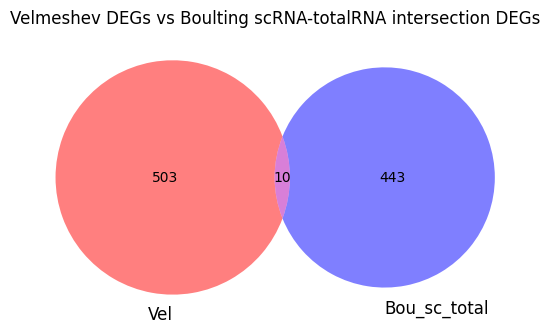

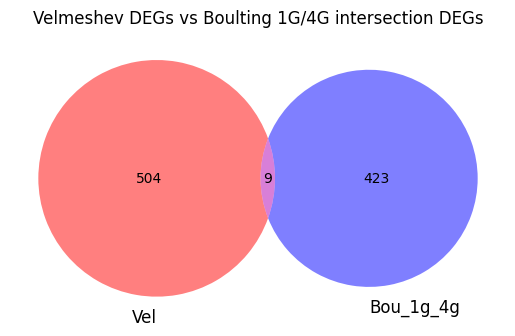

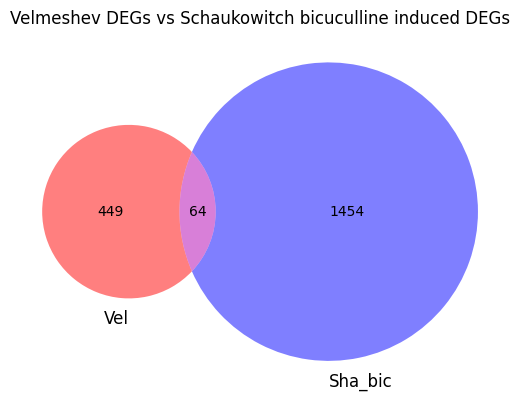

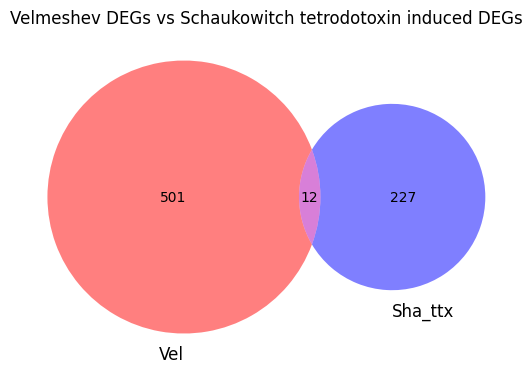

In [6]:
#Create two venn diagrams of the two gene lists and display the venn diagrams side by side
venn2([set(vel_genes), set(bou_sc_total_genes)], set_labels = ('Vel', 'Bou_sc_total'), set_colors=('r', 'b'), alpha=0.5)
plt.title('Velmeshev DEGs vs Boulting scRNA-totalRNA intersection DEGs') #the variable containing the list of overalp is 'overlap_vel_bou_sc_total'
plt.show()

venn2([set(vel_genes), set(three_inducible_in_both_1G_and_4G)], set_labels = ('Vel', 'Bou_1g_4g'), set_colors=('r', 'b'), alpha=0.5)
plt.title('Velmeshev DEGs vs Boulting 1G/4G intersection DEGs') #the variable containing the list of overalp is 'overlap_vel_bou_1g_4g'
plt.show()

venn2([set(vel_genes), set(sha_bic_genes)], set_labels = ('Vel', 'Sha_bic'), set_colors=('r', 'b'), alpha=0.5)
plt.title('Velmeshev DEGs vs Schaukowitch bicuculline induced DEGs') #the variable containing the list of overalp is 'overlap_vel_sha_bic_genes'
plt.show()

venn2([set(vel_genes), set(sha_ttx_genes)], set_labels = ('Vel', 'Sha_ttx'), set_colors=('r', 'b'), alpha=0.5)
plt.title('Velmeshev DEGs vs Schaukowitch tetrodotoxin induced DEGs') #the variable containing the list of overalp is 'overlap_vel_sha_ttx_genes'
plt.show()